## 전국 시군구 모델링 
### 데이터셋 개요


In [1]:
#기본 경로 설정
%cd C:/Users/ajtwl/Documents/GitHub/DataSafe

C:\Users\ajtwl\Documents\GitHub\DataSafe


In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)


In [5]:
## 기본 설정
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [6]:
path1 = 'C:/Users/ajtwl/Documents/GitHub/DataSafe/Data/92dataset.csv'
df = pd.read_csv(path1)
df

,광역시도,시군구명,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,강원도,강릉시,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,0.993728,...,1.9,1.4,-4.765,-0.06,13.51,253.45,260.93,337.66,1292.13,1.046
1,강원도,고성군,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,0.999529,...,0.3,0.1,7.355,-0.08,36.41,245.63,276.25,363.99,1339.71,0.468
2,강원도,동해시,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,0.909972,...,0.7,0.4,-12.665,-0.03,15.88,187.19,190.97,250.96,955.67,0.862
3,강원도,삼척시,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.000000,...,0.5,0.2,-4.845,-0.01,22.84,164.70,181.63,265.87,928.88,0.697
4,강원도,속초시,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,0.954525,...,0.8,0.4,-6.230,-0.44,7.13,262.22,265.45,322.82,1284.43,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,인천광역시,부평구,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,1.000000,...,1.6,1.9,4.955,4.50,-0.50,262.09,342.59,384.32,4717.64,1.132
88,인천광역시,서구,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.000000,...,1.8,2.2,6.465,18.40,31.00,340.56,444.66,413.99,5558.38,1.311
89,인천광역시,연수구,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,0.901417,...,1.3,1.8,2.380,10.48,12.79,442.52,501.54,419.18,6291.41,1.501
90,인천광역시,옹진군,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.000000,...,0.2,0.0,6.945,-6.28,9.73,24.18,38.62,62.74,615.39,0.161


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   광역시도               92 non-null     object 
 1   시군구명               92 non-null     object 
 2   기타관광               92 non-null     float64
 3   레저스포츠              92 non-null     float64
 4   문화관광               92 non-null     float64
 5   쇼핑                 92 non-null     float64
 6   자연관광               92 non-null     float64
 7   역사.체험관광            92 non-null     float64
 8   총 관광지 수            92 non-null     float64
 9   도시비율               92 non-null     float64
 10  임야면적 비율            92 non-null     float64
 11  농업용지 비율            92 non-null     float64
 12  해면비율               92 non-null     float64
 13  육지 도시화 정도          92 non-null     float64
 14  해면 도시화 정도          92 non-null     float64
 15  도시지역 인구 (명)        92 non-null     float64
 16  1인당 주거지역 (㎡)       92 non-nu

In [8]:
## PCA 분석을 위한 데이터 슬라이싱
x = df.iloc[:,2:]
x

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,28.083333,56.750000,79.583333,24.083333,69.666667,53.083333,311.250000,0.993728,79.566831,9.759298,...,1.9,1.4,-4.765,-0.06,13.51,253.45,260.93,337.66,1292.13,1.046
1,18.833333,35.416667,27.833333,7.583333,51.583333,18.083333,159.333333,0.999529,82.520355,8.309360,...,0.3,0.1,7.355,-0.08,36.41,245.63,276.25,363.99,1339.71,0.468
2,16.000000,11.583333,20.666667,13.000000,24.000000,9.666667,94.916667,0.909972,67.485992,6.898456,...,0.7,0.4,-12.665,-0.03,15.88,187.19,190.97,250.96,955.67,0.862
3,27.000000,17.000000,26.916667,8.416667,58.166667,23.083333,160.583333,1.000000,87.481567,5.956220,...,0.5,0.2,-4.845,-0.01,22.84,164.70,181.63,265.87,928.88,0.697
4,25.333333,22.166667,43.666667,12.916667,24.083333,16.333333,144.500000,0.954525,69.939210,7.354720,...,0.8,0.4,-6.230,-0.44,7.13,262.22,265.45,322.82,1284.43,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.666667,17.583333,55.166667,22.083333,0.333333,13.166667,110.000000,1.000000,22.219756,3.511367,...,1.6,1.9,4.955,4.50,-0.50,262.09,342.59,384.32,4717.64,1.132
88,13.333333,63.916667,125.250000,21.083333,11.500000,13.250000,248.333333,1.000000,18.971929,11.065046,...,1.8,2.2,6.465,18.40,31.00,340.56,444.66,413.99,5558.38,1.311
89,7.083333,46.166667,117.083333,18.916667,6.833333,17.916667,214.000000,0.901417,5.215615,1.395477,...,1.3,1.8,2.380,10.48,12.79,442.52,501.54,419.18,6291.41,1.501
90,22.500000,15.583333,5.416667,2.000000,45.083333,4.750000,95.333333,1.000000,72.373252,17.218051,...,0.2,0.0,6.945,-6.28,9.73,24.18,38.62,62.74,615.39,0.161


In [9]:
## 표준화, 정규화 진행 과정
### 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()   

standardized_data = scaler.fit_transform(x)
standardized_data = pd.DataFrame(standardized_data, columns=x.columns)
##
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(standardized_data)

x = pd.DataFrame(data, columns=x.columns)
x

,기타관광,레저스포츠,문화관광,쇼핑,자연관광,역사.체험관광,총 관광지 수,도시비율,임야면적 비율,농업용지 비율,...,음식,학문/교육,계절성,요일성,성별 편향,30대 이하,30 - 50대,50대 이상,소계(남녀합계)/sum/mean,소멸지수
0,0.670659,0.649020,0.210801,0.382395,1.000000,0.545616,0.591915,0.991438,0.890006,0.253801,...,0.53125,0.388889,0.124808,0.300436,0.285984,0.274618,0.209454,0.348485,0.053769,0.537341
1,0.449102,0.398039,0.063714,0.096681,0.740431,0.173605,0.274264,0.999357,0.923043,0.216093,...,0.03125,0.027778,0.191154,0.300223,0.452034,0.265251,0.223888,0.381861,0.057549,0.186400
2,0.381238,0.117647,0.043344,0.190476,0.344498,0.084145,0.139571,0.877090,0.754874,0.179401,...,0.15625,0.111111,0.081563,0.300755,0.303169,0.195252,0.143540,0.238585,0.027036,0.425622
3,0.644711,0.181373,0.061108,0.111111,0.834928,0.226749,0.276878,1.000000,0.978538,0.154898,...,0.09375,0.055556,0.124370,0.300968,0.353636,0.168314,0.134740,0.257485,0.024908,0.325440
4,0.604790,0.242157,0.108716,0.189033,0.345694,0.155004,0.243248,0.937915,0.782315,0.191267,...,0.18750,0.111111,0.116789,0.296395,0.239722,0.285122,0.213712,0.329674,0.053157,0.446873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.037924,0.188235,0.141402,0.347763,0.004785,0.121346,0.171110,1.000000,0.248542,0.091317,...,0.43750,0.527778,0.178016,0.348931,0.184396,0.284967,0.286391,0.407631,0.325936,0.589557
88,0.317365,0.733333,0.340597,0.330447,0.165072,0.122232,0.460359,1.000000,0.212213,0.287758,...,0.50000,0.611111,0.186282,0.496756,0.412805,0.378957,0.382559,0.445240,0.392735,0.698239
89,0.167665,0.524510,0.317385,0.292929,0.098086,0.171833,0.388569,0.865410,0.058340,0.036291,...,0.34375,0.500000,0.163921,0.412528,0.280763,0.501084,0.436149,0.451819,0.450977,0.813600
90,0.536926,0.164706,0.000000,0.000000,0.647129,0.031887,0.140443,1.000000,0.809542,0.447773,...,0.00000,0.000000,0.188910,0.234287,0.258574,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
pca = PCA(n_components = 15)
pca.fit(x)
for i in range(15) :
    print("{}번째 차원 설명력: {}".format(i+1,round(pca.explained_variance_ratio_[i],2)))
    print("{}번째까지의 설명력: {}".format(i+1,round(np.cumsum(pca.explained_variance_ratio_)[i],2)))
    print("--------------------------------------------")


1번째 차원 설명력: 0.43
1번째까지의 설명력: 0.43
--------------------------------------------
2번째 차원 설명력: 0.18
2번째까지의 설명력: 0.61
--------------------------------------------
3번째 차원 설명력: 0.07
3번째까지의 설명력: 0.67
--------------------------------------------
4번째 차원 설명력: 0.06
4번째까지의 설명력: 0.74
--------------------------------------------
5번째 차원 설명력: 0.05
5번째까지의 설명력: 0.79
--------------------------------------------
6번째 차원 설명력: 0.04
6번째까지의 설명력: 0.82
--------------------------------------------
7번째 차원 설명력: 0.03
7번째까지의 설명력: 0.85
--------------------------------------------
8번째 차원 설명력: 0.02
8번째까지의 설명력: 0.87
--------------------------------------------
9번째 차원 설명력: 0.02
9번째까지의 설명력: 0.89
--------------------------------------------
10번째 차원 설명력: 0.02
10번째까지의 설명력: 0.91
--------------------------------------------
11번째 차원 설명력: 0.02
11번째까지의 설명력: 0.93
--------------------------------------------
12번째 차원 설명력: 0.01
12번째까지의 설명력: 0.94
--------------------------------------------
13번째 차원 설명력: 0.01
13번째까지의 설명력: 0.95
----------

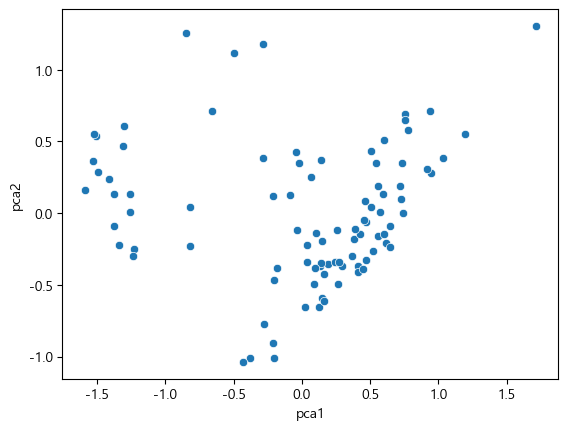

<Figure size 1500x1500 with 0 Axes>

In [11]:
pca = PCA(n_components = 2)  #2차원으로 pca 진행

pca_data = pca.fit_transform(x) #데이터 변환 후 변수에 저장

df['pca1'] = pca_data[:,0] #데이터파일에 pca변수 추가
df['pca2'] = pca_data[:,1]

sns.scatterplot(x = df['pca1'], y=df['pca2'])
plt.figure(figsize=(15,15))
plt.show()

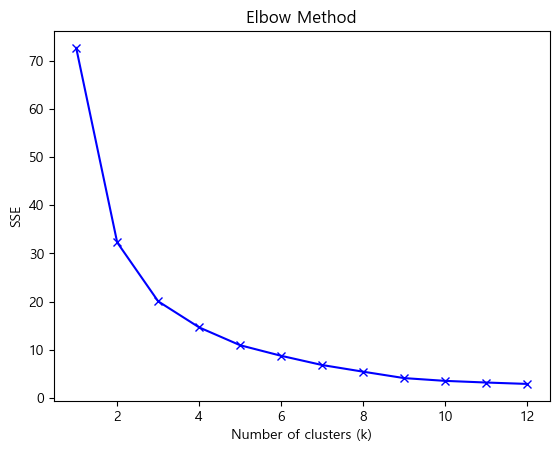

<Figure size 1200x1200 with 0 Axes>

In [18]:
x = df.iloc[:,-2:]  # 분석에 사용 될 pca 변수로 x 데이터 재정의

from sklearn.cluster import KMeans

X = x

# K 값과 SSE를 저장할 리스트 생성
k_list = range(1, 13)
sse_list = []

# K 값을 변화시키면서 SSE 계산
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse_list.append(kmeans.inertia_)

# SSE 그래프 출력
plt.plot(k_list, sse_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.figure(figsize=(12,12))
plt.show()

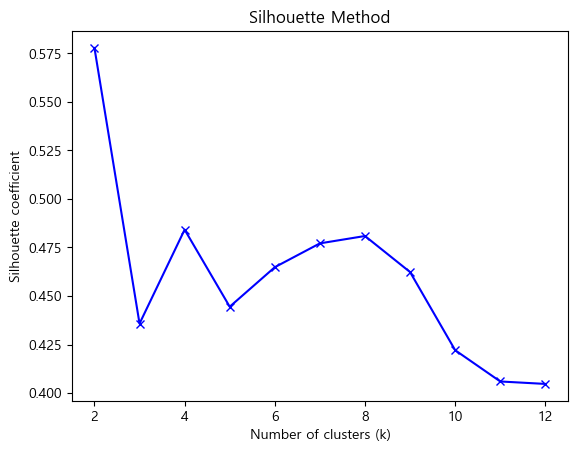

<Figure size 1200x1200 with 0 Axes>

In [19]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 데이터 불러오기
X = x
# K 값과 Silhouette coefficient를 저장할 리스트 생성
k_list = range(2, 13)
silhouette_list = []

# K 값을 변화시키면서 Silhouette coefficient 계산
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_list.append(silhouette_avg)

# Silhouette coefficient 그래프 출력
plt.plot(k_list, silhouette_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Method')
plt.figure(figsize=(12,12))
plt.show()



In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math


    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows = 1, ncols = n_cols)


    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters = n_cluster, n_init=10, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

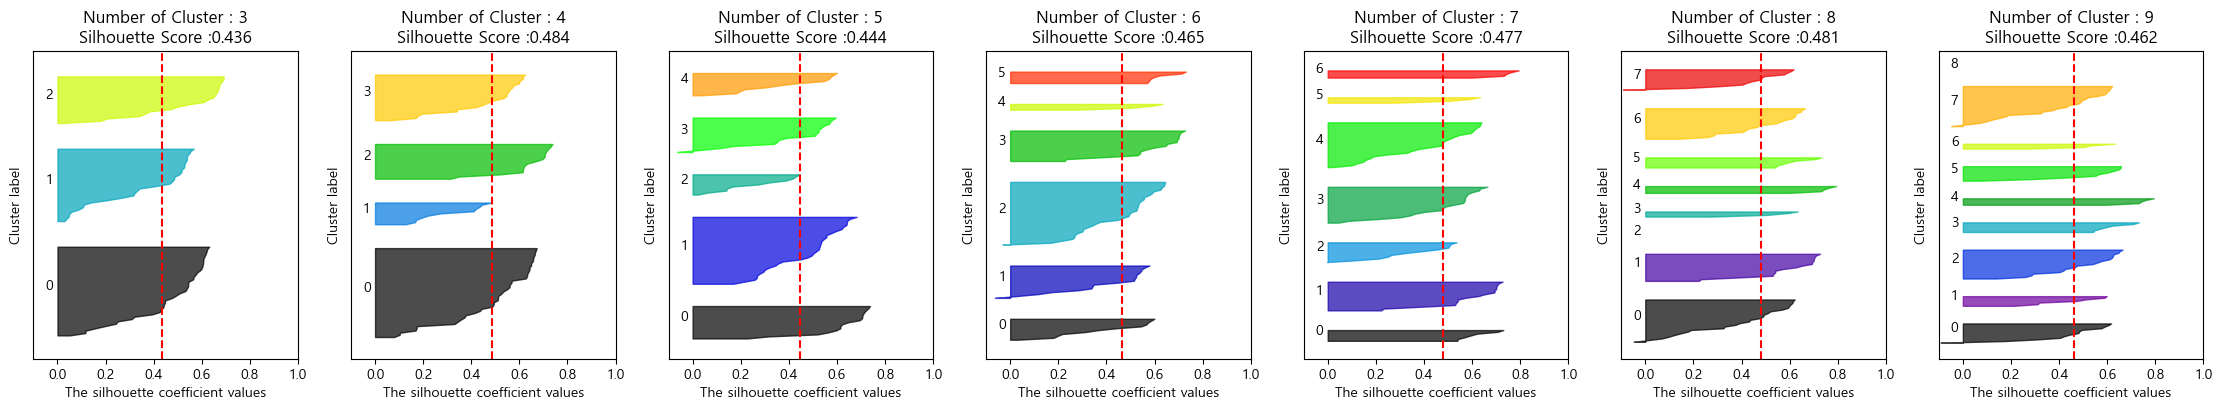

In [21]:
visualize_silhouette([ 3, 4, 5, 6, 7, 8, 9 ], x)

[5 1 1 1 1 1 1 1 5 1 1 1 5 1 1 1 1 1 2 4 4 2 3 4 2 0 0 3 4 3 4 4 4 2 2 4 0
 4 0 4 6 4 3 4 4 4 6 4 4 6 6 2 2 3 4 2 3 3 3 4 3 4 3 4 3 4 2 4 3 2 3 3 4 3
 0 3 3 3 4 0 5 4 1 4 2 6 3 3 2 3 1 0]


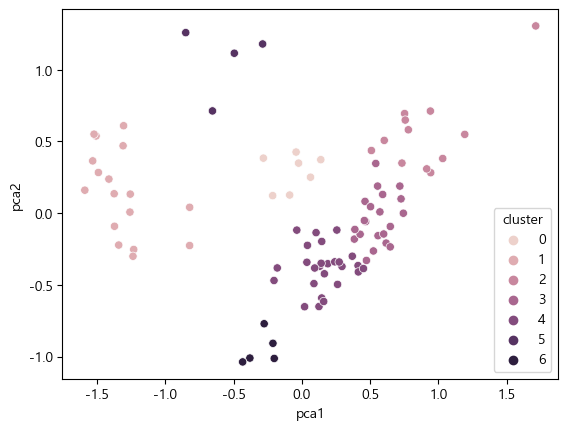

<Figure size 1500x1200 with 0 Axes>

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(x)

print(kmeans.labels_)
df['cluster'] = kmeans.labels_  # 각 군집에 해당하는 행정동을 파악하기 위해 라벨 값을 칼럼으로 추가

sns.scatterplot(x = df['pca1'], y=df['pca2'], hue=df['cluster'])
plt.figure(figsize=(15,12))
plt.show()

In [23]:
df['cluster'].unique()

array([5, 1, 2, 4, 3, 0, 6])

In [14]:
## cluster, pca 성분 추가된 df 저장
#df.to_csv('kangwon.csv', index=False)